In [6]:
# Erasmus+ ICCT project (2018-1-SI01-KA203-047081)

%matplotlib notebook
import control as c
import ipywidgets as w
import numpy as np

from IPython.display import display, HTML
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation as animation

# Toggle cell visibility

from IPython.display import HTML
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.input').hide()
    } else {
        $('div.input').show()
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
Toggle cell visibility <a href="javascript:code_toggle()">here</a>.''')
display(tag)

# Hide the code completely

# from IPython.display import HTML
# tag = HTML('''<style>
# div.input {
#     display:none;
# }
# </style>''')
# display(tag)

Traceback (most recent call last):
  File "C:\Users\Uporabnik\Anaconda3\envs\icct2\lib\site-packages\matplotlib\cbook\__init__.py", line 216, in process
    func(*args, **kwargs)
  File "C:\Users\Uporabnik\Anaconda3\envs\icct2\lib\site-packages\matplotlib\animation.py", line 1465, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


## Krmiljenje enosmernega elektromotorja na kaskadni način

V tem interaktivnem primeru je prikazana izvedba krmiljenja enosmernega elektromotorja z uporabo dveh ločenih krmilnikov. Model elektromotorja lahko razdelimo na električni in mehanski del, inducirano napetost pa zanemarimo.
<br><br>
<img src="Images/dcmot.png" width="40%" />
<br>
Prenosni funkciji električnega in mehanskega dela enosmernega elektromotorja sta:
<br>
$$G_{elec}(s)=\frac{1}{sL+R}\qquad\qquad G_{mech}=\frac{1}{sJ+B}$$
<br>
Tvoja naloga je izbrati dva tipa krmilnikov in ju nastaviti tako, da bo njuno delovanje ustrezno!

<b>Najprej izberi model sistema!</b>

<!-- The following example is a control design task for a DC motor, implemented through two separate controllers. The DC motor's model can be divided into an electrical and a mechanical component, while the back-EMF is not ignored.
<br><br>
<img src="Images/dcmot.png" width="40%" />
<br>
The transfer functions of the motor components are:
<br>
$$G_{elec}(s)=\frac{1}{sL+R}\qquad\qquad G_{mech}=\frac{1}{sJ+B}$$
<br>
Your task is to choose two types of controllers, and tune them to acceptable levels of performance!

<b>First, choose a system model!</b> -->

<IPython.core.display.Javascript object>


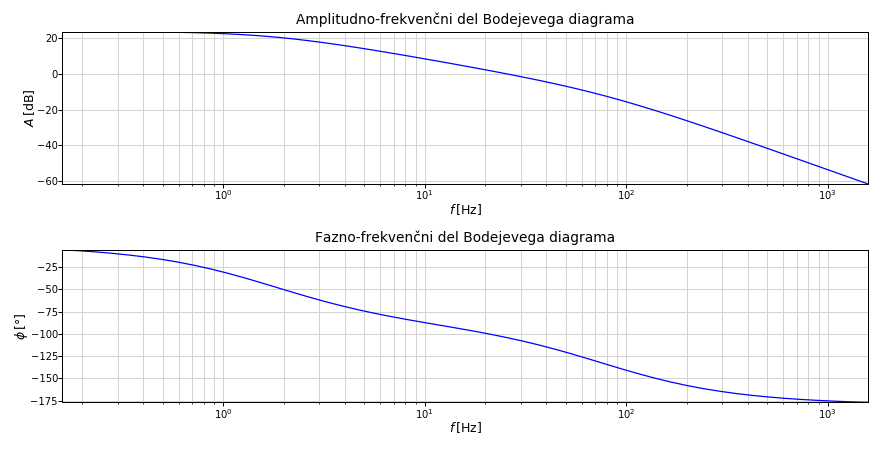

ToggleButtons(description='System: ', index=6, layout=Layout(width='60%'), options=(('Model 1', 0), ('Model 2'…

Output()

In [7]:
# Parameters
R = [0.5, 0.25, 0.5, 1.0, 1.5, 0.25, 1.0]                       # Armature resistance - Ohm
L = [1.5e-3, 5.0e-4, 2.0e-3, 1.5e-3, 5.0e-4, 2.0e-3, 2.0e-3]    # Armature inductance - H
J = [2.5e-4, 1.0e-3, 5.0e-4, 1.5e-4, 1.5e-4, 5.0e-4, 3.0e-4]    # Moment of inertia - kgm^2
B = [1.0e-3, 1.5e-3, 1.0e-3, 5.0e-4, 1.0e-3, 5.0e-4, 7.5e-4]    # Damping factor - Nms
kPhi = 0.05                                                     # Torque constant / Electromotive force - Nm/A or Vs/rad

fig1, ((f1_ax1), (f1_ax2)) = plt.subplots(2, 1, num='Slika 1')
fig1.set_size_inches((9.8, 5))
fig1.set_tight_layout(True)

f1_line1, = f1_ax1.plot([], [])
f1_line2, = f1_ax2.plot([], [])  

f1_ax1.grid(which='both', axis='both', color='lightgray')
f1_ax2.grid(which='both', axis='both', color='lightgray')

f1_ax1.autoscale(enable=True, axis='both', tight=True)
f1_ax2.autoscale(enable=True, axis='both', tight=True)

f1_ax1.set_title('Amplitudno-frekvenčni del Bodejevega diagrama', fontsize=11)
f1_ax1.set_xscale('log')
f1_ax1.set_xlabel(r'$f\/$[Hz]', labelpad=0, fontsize=10)
f1_ax1.set_ylabel(r'$A\/$[dB]', labelpad=0, fontsize=10)
f1_ax1.tick_params(axis='both', which='both', pad=0, labelsize=8)

f1_ax2.set_title('Fazno-frekvenčni del Bodejevega diagrama', fontsize=11)
f1_ax2.set_xscale('log')
f1_ax2.set_xlabel(r'$f\/$[Hz]', labelpad=0, fontsize=10)
f1_ax2.set_ylabel(r'$\phi\/$[°]', labelpad=0, fontsize=10)
f1_ax2.tick_params(axis='both', which='both', pad=0, labelsize=8)

def build_base_model(sel):
    
    # System model
    W_e = c.tf([1], [L[sel], R[sel]])   # Electrical part
    W_m = c.tf([1], [J[sel], B[sel]])   # Mechanical part
    W_t = c.tf([kPhi], [1])   # EMF / torque constant

    W_motor = c.feedback(c.series(W_e, W_t, W_m), W_t, -1)   # DC motor transfer function
    print('Prenosna funkcija DC motorja:')
    print(W_motor)

    # System analysis
    print('Poli sistema:\n')
    poles = c.pole(W_motor)   # Poles
    print(poles)

    time_constants = -1 / poles   # For stable, real poles
    print('\nČasovne konstante realnih, stabilnih polov:\n')
    print(time_constants)
    
    global f1_line1, f1_line2
    
    f1_ax1.lines.remove(f1_line1)
    f1_ax2.lines.remove(f1_line2)
    
    mag, phase, omega = c.bode_plot(W_motor, Plot=False)   # Bode-plot
    
    f1_line1, = f1_ax1.plot(omega/2/np.pi, 20*np.log10(mag), lw=1, color='blue')
    f1_line2, = f1_ax2.plot(omega/2/np.pi, phase*180/np.pi, lw=1, color='blue')   
    
    f1_ax1.relim()
    f1_ax2.relim()
    f1_ax1.autoscale_view()
    f1_ax2.autoscale_view()
    
# GUI widgets
typeSelect = w.ToggleButtons(
    options=[('Model 1', 0), ('Model 2', 1), ('Model 3', 2), ('Model 4', 3), ('Model 5', 4), ('Model 6', 5), ('Ponastavi', -1)],
    value=-1, description='System: ', layout=w.Layout(width='60%'))

input_data = w.interactive_output(build_base_model, {'sel':typeSelect})

display(typeSelect, input_data)

Krmilnik izveden na kaskadni način sestoji iz hitre krmilne zanke vdelane v večjo krmilno zanko.V tem interaktivnem primeru notranja krmilna zanka krmili električni tok, zunanja pa hitrost motorja. Na ta način dosežemo optimalnejše in varnejše delovanje motorja.
<br><br>
<img src="Images/cascade.png" width="60%" />
<br>

<b>Izberi ustrezen krmilnik za notranjo krmilno zanko! Kateri krmilnik je najsutreznejši za izbrani sistem? Zakaj?<br>
Nastavi parametre krmilnika tako, da bo čas ustalitve čim krajši, ob tem pa bo znašal prenihaj največ 25%!</b>

I in D komponenti PID krmilnika lahko prosto vklapljaš/izklapljaš; če je vklopljena D komponenta, lahko uporabiš tudi filter prvega reda, ki temelji na časovni konstanti D komponente.

<!-- The cascade controller consists of a fast controlled loop embedded within a larger one. In this example, the internal loop controls the current, and the external controls the motor's speed. This way, optimal and safe operation can be achieved.
<br><br>
<img src="Images/cascade.png" width="60%" />
<br>

<b>Select a fitting controller for the internal loop! Which one is the best for your system? Why?<br>
Set up your controller for the fastest settling time with at most 25% overshoot!</b>

You can turn on/off each of the I and D components, and if D is active, you can apply the first-order filter as well, based on the derivating time constant. -->

<IPython.core.display.Javascript object>


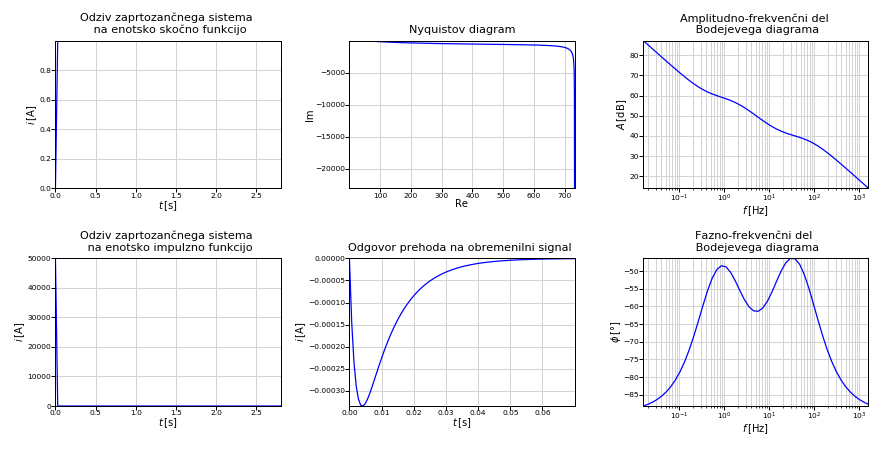

Output()

In [8]:
# PID current control

fig2, ((f2_ax1, f2_ax2, f2_ax3), (f2_ax4, f2_ax5, f2_ax6)) = plt.subplots(2, 3, num='Slika 1')
fig2.set_size_inches((9.8, 5))
fig2.set_tight_layout(True)

f2_line1, = f2_ax1.plot([], [])
f2_line2, = f2_ax2.plot([], []) 
f2_line3, = f2_ax3.plot([], [])
f2_line4, = f2_ax4.plot([], [])  
f2_line5, = f2_ax5.plot([], [])
f2_line6, = f2_ax6.plot([], [])

f2_ax1.grid(which='both', axis='both', color='lightgray')
f2_ax2.grid(which='both', axis='both', color='lightgray')
f2_ax3.grid(which='both', axis='both', color='lightgray')
f2_ax4.grid(which='both', axis='both', color='lightgray')
f2_ax5.grid(which='both', axis='both', color='lightgray')
f2_ax6.grid(which='both', axis='both', color='lightgray')

f2_ax1.autoscale(enable=True, axis='both', tight=True)
f2_ax2.autoscale(enable=True, axis='both', tight=True)
f2_ax3.autoscale(enable=True, axis='both', tight=True)
f2_ax4.autoscale(enable=True, axis='both', tight=True)
f2_ax5.autoscale(enable=True, axis='both', tight=True)
f2_ax6.autoscale(enable=True, axis='both', tight=True)

f2_ax1.set_title('Odziv zaprtozančnega sistema \n na enotsko skočno funkcijo', fontsize=9)
f2_ax1.set_xlabel(r'$t\/$[s]', labelpad=0, fontsize=8)
f2_ax1.set_ylabel(r'$i\/$[A]', labelpad=0, fontsize=8)
f2_ax1.tick_params(axis='both', which='both', pad=0, labelsize=6)

f2_ax2.set_title('Nyquistov diagram', fontsize=9)
f2_ax2.set_xlabel(r'Re', labelpad=0, fontsize=8)
f2_ax2.set_ylabel(r'Im', labelpad=0, fontsize=8)
f2_ax2.tick_params(axis='both', which='both', pad=0, labelsize=6)

f2_ax3.set_title('Amplitudno-frekvenčni del \n Bodejevega diagrama', fontsize=9)
f2_ax3.set_xscale('log')
f2_ax3.set_xlabel(r'$f\/$[Hz]', labelpad=0, fontsize=8)
f2_ax3.set_ylabel(r'$A\/$[dB]', labelpad=0, fontsize=8)
f2_ax3.tick_params(axis='both', which='both', pad=0, labelsize=6)

f2_ax4.set_title('Odziv zaprtozančnega sistema \n na enotsko impulzno funkcijo', fontsize=9)
f2_ax4.set_xlabel(r'$t\/$[s]', labelpad=0, fontsize=8)
f2_ax4.set_ylabel(r'$i\/$[A]', labelpad=0, fontsize=8)
f2_ax4.tick_params(axis='both', which='both', pad=0, labelsize=6)

f2_ax5.set_title('Odgovor prehoda na obremenilni signal ', fontsize=9)
f2_ax5.set_xlabel(r'$t\/$[s]', labelpad=0, fontsize=8)
f2_ax5.set_ylabel(r'$i\/$[A]', labelpad=0, fontsize=8)
f2_ax5.tick_params(axis='both', which='both', pad=0, labelsize=6)

f2_ax6.set_title('Fazno-frekvenčni del \n Bodejevega diagrama', fontsize=9)
f2_ax6.set_xscale('log')
f2_ax6.set_xlabel(r'$f\/$[Hz]', labelpad=0, fontsize=8)
f2_ax6.set_ylabel(r'$\phi\/$[°]', labelpad=0, fontsize=8)
f2_ax6.tick_params(axis='both', which='both', pad=0, labelsize=6)

def current_control(iKp, iTi, iTd, iFd, iTi0, iTd0, iFd0, sel):
    
    W_e = c.tf([1], [L[sel], R[sel]])   # Electrical part
    W_m = c.tf([1], [J[sel], B[sel]])   # Mechanical part
    W_t = c.tf([kPhi], [1])   # EMF / torque constant
    W_current = c.feedback(W_e, c.series(W_t, W_m, W_t))   # System model for current output
    
    # PID Controller
    
    iP = iKp             # Proportional term
    iI = iKp / iTi       # Integral term
    iD = iKp * iTd       # Derivative term
    iTd_f = iTd / iFd    # Derivative term filter
    
    W_iPID = c.parallel(c.tf([iP], [1]),
                        c.tf([iI * iTi0], [1 * iTi0, 1 * (not iTi0)]),
                        c.tf([iD * iTd0, 0], [iTd_f * iTd0 * iFd0, 1]))  # PID controller in time constant format
    
    W_icont_open = c.series(W_iPID, W_current)          # Open loop of the current controlled system
    W_icont_closed = c.feedback(W_icont_open, 1, -1)    # Closed loop
    
    W_iload = c.feedback(c.series(W_e, W_t, c.tf([-1], [1]),
                                  c.feedback(W_m, W_iPID, -1)), W_t, 1)    # Load transfer function    
    # Display
    
    global f2_line1, f2_line2, f2_line3, f2_line4, f2_line5, f2_line6
    
    f2_ax1.lines.remove(f2_line1)
    f2_ax2.lines.remove(f2_line2)
    f2_ax3.lines.remove(f2_line3)
    f2_ax4.lines.remove(f2_line4)
    f2_ax5.lines.remove(f2_line5)
    f2_ax6.lines.remove(f2_line6)
    
    tout, yout = c.step_response(W_icont_closed)
    f2_line1, = f2_ax1.plot(tout, yout, lw=1, color='blue')
    
    _, _, ob = c.nyquist_plot(W_icont_open, Plot=False)   # Small resolution plot to determine bounds        
    real, imag, freq = c.nyquist_plot(W_icont_open, omega=np.logspace(np.log10(ob[0]), np.log10(ob[-1]), 1000), Plot=False)
    f2_line2, = f2_ax2.plot(real, imag, lw=1, color='blue')
    
    mag, phase, omega = c.bode_plot(W_icont_open, Plot=False)
    f2_line3, = f2_ax3.plot(omega/2/np.pi, 20*np.log10(mag), lw=1, color='blue')
    f2_line6, = f2_ax6.plot(omega/2/np.pi, phase*180/np.pi, lw=1, color='blue')
    
    tout, yout = c.impulse_response(W_icont_closed)
    f2_line4, = f2_ax4.plot(tout, yout, lw=1, color='blue')  
    
    tout, yout = c.step_response(W_iload)
    f2_line5, = f2_ax5.plot(tout, yout, lw=1, color='blue')
    
    f2_ax1.relim()
    f2_ax2.relim()
    f2_ax3.relim()
    f2_ax4.relim()
    f2_ax5.relim()
    f2_ax6.relim()
    f2_ax1.autoscale_view()
    f2_ax2.autoscale_view()
    f2_ax3.autoscale_view()
    f2_ax4.autoscale_view()
    f2_ax5.autoscale_view()
    f2_ax6.autoscale_view()
    
def update_current_controller(index):
    global iKp_slider, iTi_slider, iTd_slider, iFd_slider, iTi_button, iTd_button, iFd_button
    
    if index == -1:
        iKp_slider.value = 100.0
        iTi_slider.value = 0.01
        iTi_button.value = True
        iTd_button.value = False
        iFd_button.value = False
        
        iKp_slider.disabled = True
        iTi_slider.disabled = True
        iTd_slider.disabled = True
        iFd_slider.disabled = True
        iTi_button.disabled = True
        iTd_button.disabled = True
        iFd_button.disabled = True
    else:
        iKp_slider.disabled = False
        iTi_slider.disabled = False
        iTd_slider.disabled = False
        iFd_slider.disabled = False
        iTi_button.disabled = False
        iTd_button.disabled = False
        iFd_button.disabled = False

# Controllers

iKp_slider = w.FloatLogSlider(value=0.5, base=10, min=-3, max=3, description='Kp:', continuous_update=False,
                               layout=w.Layout(width='auto', flex='5 5 auto'))
iTi_slider = w.FloatLogSlider(value=0.0035, base=10, min=-4, max=1, description='', continuous_update=False,
                               layout=w.Layout(width='auto', flex='5 5 auto'))
iTd_slider = w.FloatLogSlider(value=1, base=10, min=-4, max=1, description='', continuous_update=False,
                               layout=w.Layout(width='auto', flex='5 5 auto'))
iFd_slider = w.FloatLogSlider(value=1, base=10, min=0, max=3, description='', continuous_update=False,
                               layout=w.Layout(width='auto', flex='5 5 auto'))

iTi_button = w.ToggleButton(value=True, description='Ti',
                           layout=w.Layout(width='auto', flex='1 1 0%'))
iTd_button = w.ToggleButton(value=False, description='Td',
                           layout=w.Layout(width='auto', flex='1 1 0%'))
iFd_button = w.ToggleButton(value=False, description='Fd',
                           layout=w.Layout(width='auto', flex='1 1 0%'))

input_data = w.interactive_output(current_control, {'iKp': iKp_slider, 'iTi': iTi_slider, 'iTd': iTd_slider,
                                                 'iFd': iFd_slider, 'iTi0' : iTi_button, 'iTd0': iTd_button,
                                                 'iFd0': iFd_button, 'sel':typeSelect})

w.interactive_output(update_current_controller, {'index':typeSelect})

display(w.HBox([iKp_slider, iTi_button, iTi_slider, iTd_button, iTd_slider, iFd_button, iFd_slider]), input_data)

Izbrani krmilnik mora biti nastavljen tako, da lahko z njim krmilimo tudi hitrost sistema.<br>
<b>Izberi ustrezne nastavitve krmilnika! Prilagodi trenutni krmilnik, če je to potrebno.<br>
Nastavi krmilnik tako, da dosežeš najhitrejši čas ustalitve!</b>

I in D komponenti krmilnika lahko vključiš ali izključiš iz krmilnika; če je D komponenta vključena, lahko apliciraš filter prvega reda, glede na diferencirno časovno konstanto.

<!-- The current controller should be set up so that it is still possible to control the system for speed as well.<br>
<b>Select a fitting controller configuration! Readjust the current controller if necessary.<br>
Set up your controller for the fastest settling time!</b>

You can turn on/off each of the I and D components, and if D is active, you can apply a first-order filter as well, based on the derivating time constant. -->

<IPython.core.display.Javascript object>


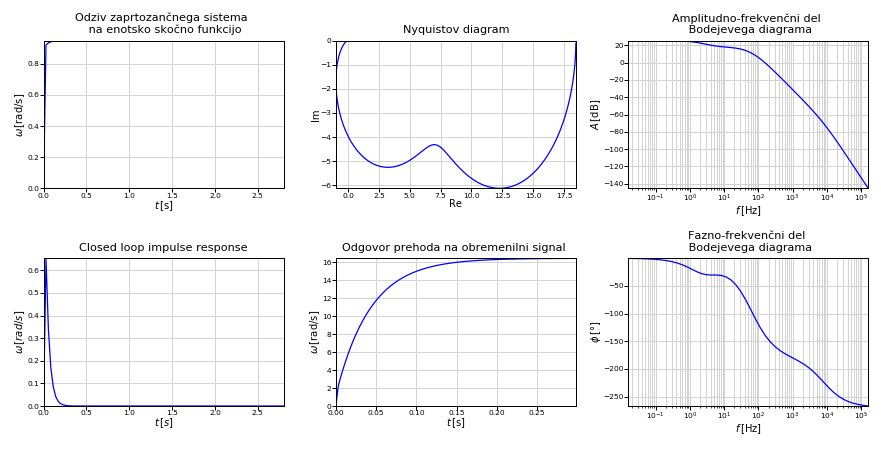

Output()

In [9]:
# PID speed control

fig3, ((f3_ax1, f3_ax2, f3_ax3), (f3_ax4, f3_ax5, f3_ax6)) = plt.subplots(2, 3, num='Slika 3')
fig3.set_size_inches((9.8, 5))
fig3.set_tight_layout(True)

f3_line1, = f3_ax1.plot([], [])
f3_line2, = f3_ax2.plot([], []) 
f3_line3, = f3_ax3.plot([], [])
f3_line4, = f3_ax4.plot([], [])  
f3_line5, = f3_ax5.plot([], [])
f3_line6, = f3_ax6.plot([], [])

f3_ax1.grid(which='both', axis='both', color='lightgray')
f3_ax2.grid(which='both', axis='both', color='lightgray')
f3_ax3.grid(which='both', axis='both', color='lightgray')
f3_ax4.grid(which='both', axis='both', color='lightgray')
f3_ax5.grid(which='both', axis='both', color='lightgray')
f3_ax6.grid(which='both', axis='both', color='lightgray')

f3_ax1.autoscale(enable=True, axis='both', tight=True)
f3_ax2.autoscale(enable=True, axis='both', tight=True)
f3_ax3.autoscale(enable=True, axis='both', tight=True)
f3_ax4.autoscale(enable=True, axis='both', tight=True)
f3_ax5.autoscale(enable=True, axis='both', tight=True)
f3_ax6.autoscale(enable=True, axis='both', tight=True)

f3_ax1.set_title('Odziv zaprtozančnega sistema \n na enotsko skočno funkcijo', fontsize=9)
f3_ax1.set_xlabel(r'$t\/$[s]', labelpad=0, fontsize=8)
f3_ax1.set_ylabel(r'$\omega\/$[rad/s]', labelpad=0, fontsize=8)
f3_ax1.tick_params(axis='both', which='both', pad=0, labelsize=6)

f3_ax2.set_title('Nyquistov diagram', fontsize=9)
f3_ax2.set_xlabel(r'Re', labelpad=0, fontsize=8)
f3_ax2.set_ylabel(r'Im', labelpad=0, fontsize=8)
f3_ax2.tick_params(axis='both', which='both', pad=0, labelsize=6)

f3_ax3.set_title('Amplitudno-frekvenčni del \n Bodejevega diagrama', fontsize=9)
f3_ax3.set_xscale('log')
f3_ax3.set_xlabel(r'$f\/$[Hz]', labelpad=0, fontsize=8)
f3_ax3.set_ylabel(r'$A\/$[dB]', labelpad=0, fontsize=8)
f3_ax3.tick_params(axis='both', which='both', pad=0, labelsize=6)

f3_ax4.set_title('Closed loop impulse response', fontsize=9)
f3_ax4.set_xlabel(r'$t\/[s]$', labelpad=0, fontsize=8)
f3_ax4.set_ylabel(r'$\omega\/[rad/s]$', labelpad=0, fontsize=8)
f3_ax4.tick_params(axis='both', which='both', pad=0, labelsize=6)

f3_ax5.set_title('Odgovor prehoda na obremenilni signal ', fontsize=9)
f3_ax5.set_xlabel(r'$t\/$[s]', labelpad=0, fontsize=8)
f3_ax5.set_ylabel(r'$\omega\/$[rad/s]', labelpad=0, fontsize=8)
f3_ax5.tick_params(axis='both', which='both', pad=0, labelsize=6)

f3_ax6.set_title('Fazno-frekvenčni del \n Bodejevega diagrama', fontsize=9)
f3_ax6.set_xscale('log')
f3_ax6.set_xlabel(r'$f\/$[Hz]', labelpad=0, fontsize=8)
f3_ax6.set_ylabel(r'$\phi\/$[°]', labelpad=0, fontsize=8)
f3_ax6.tick_params(axis='both', which='both', pad=0, labelsize=6)

def speed_control(iKp, iTi, iTd, iFd, iTi0, iTd0, iFd0, wKp, wTi, wTd, wFd, wTi0, wTd0, wFd0, sel):
    
    W_e = c.tf([1], [L[sel], R[sel]])   # Electrical part
    W_m = c.tf([1], [J[sel], B[sel]])   # Mechanical part
    W_t = c.tf([kPhi], [1])   # EMF / torque constant
    W_current = c.feedback(W_e, c.series(W_t, W_m, W_t))   # System model for current output
    W_motor = c.feedback(c.series(W_e, W_t, W_m), W_t, -1)   # DC motor transfer function
    
    # Current controller
    iP = iKp             # Proportional term
    iI = iKp / iTi       # Integral term
    iD = iKp * iTd       # Derivative term
    iTd_f = iTd / iFd    # Derivative term filter
    
    W_iPID = c.parallel(c.tf([iP], [1]),
                        c.tf([iI * iTi0], [1 * iTi0, 1 * (not iTi0)]),
                        c.tf([iD * iTd0, 0], [iTd_f * iTd0 * iFd0, 1]))  # PID controller in time constant format
    
    # Speed controller   
    wP = wKp             # Proportional term
    wI = wKp / wTi       # Integral term
    wD = wKp * wTd       # Derivative term
    wTd_f = wTd / wFd    # Derivative term filter
    
    W_wPID = c.parallel(c.tf([wP], [1]),
                        c.tf([wI * wTi0], [1 * wTi0, 1 * (not wTi0)]),
                        c.tf([wD * wTd0, 0], [wTd_f * wTd0 * wFd0, 1]))  # PID controller in time constant format
    
    W_wcont_open = c.series(W_wPID, c.feedback(c.series(W_iPID, W_current), 1, -1), W_motor)  # Speed control open loop
    W_wcont_closed = c.feedback(W_wcont_open, 1, -1)   # Closed loop
    
    W_wload = c.feedback(W_m, c.series(c.parallel(W_t, c.series(W_iPID, W_wPID)),
                                       c.feedback(W_e, W_iPID, -1), W_t), -1)       # Load transfer function
    # Display
    
    global f3_line1, f3_line2, f3_line3, f3_line4, f3_line5, f3_line6
    
    f3_ax1.lines.remove(f3_line1)
    f3_ax2.lines.remove(f3_line2)
    f3_ax3.lines.remove(f3_line3)
    f3_ax4.lines.remove(f3_line4)
    f3_ax5.lines.remove(f3_line5)
    f3_ax6.lines.remove(f3_line6)
    
    tout, yout = c.step_response(W_wcont_closed)
    f3_line1, = f3_ax1.plot(tout, yout, lw=1, color='blue') 
    
    _, _, ob = c.nyquist_plot(W_wcont_open, Plot=False)   # Small resolution plot to determine bounds        
    real, imag, freq = c.nyquist_plot(W_wcont_open, omega=np.logspace(np.log10(ob[0]), np.log10(ob[-1]), 1000), Plot=False)
    f3_line2, = f3_ax2.plot(real, imag, lw=1, color='blue')
    
    mag, phase, omega = c.bode_plot(W_wcont_open, Plot=False)
    f3_line3, = f3_ax3.plot(omega/2/np.pi, 20*np.log10(mag), lw=1, color='blue')
    f3_line6, = f3_ax6.plot(omega/2/np.pi, phase*180/np.pi, lw=1, color='blue')
    
    tout, yout = c.impulse_response(W_wcont_closed)
    f3_line4, = f3_ax4.plot(tout, yout, lw=1, color='blue')   
    
    tout, yout = c.step_response(W_wload)
    f3_line5, = f3_ax5.plot(tout, yout, lw=1, color='blue') 
    
    f3_ax1.relim()
    f3_ax2.relim()
    f3_ax3.relim()
    f3_ax4.relim()
    f3_ax5.relim()
    f3_ax6.relim()
    f3_ax1.autoscale_view()
    f3_ax2.autoscale_view()
    f3_ax3.autoscale_view()
    f3_ax4.autoscale_view()
    f3_ax5.autoscale_view()
    f3_ax6.autoscale_view()
    
def update_speed_controller(index):
    global wKp_slider, wTi_slider, wTd_slider, wFd_slider, wTi_button, wTd_button, wFd_button
    
    if index == -10:
        wKp_slider.value = 10.0
        wTd_slider.value = 0.05
        wFd_slider.value = 10.0
        wTi_button.value = False
        wTd_button.value = True
        wFd_button.value = True
        
        wKp_slider.disabled = True
        wTi_slider.disabled = True
        wTd_slider.disabled = True
        wFd_slider.disabled = True
        wTi_button.disabled = True
        wTd_button.disabled = True
        wFd_button.disabled = True
    else:
        wKp_slider.disabled = False
        wTi_slider.disabled = False
        wTd_slider.disabled = False
        wFd_slider.disabled = False
        wTi_button.disabled = False
        wTd_button.disabled = False
        wFd_button.disabled = False
    
# Controllers

wKp_slider = w.FloatLogSlider(value=1.2, base=10, min=-3, max=3, description='Kp:', continuous_update=False,
                               layout=w.Layout(width='auto', flex='5 5 auto'))
wTi_slider = w.FloatLogSlider(value=1, base=10, min=-4, max=1, description='', continuous_update=False,
                               layout=w.Layout(width='auto', flex='5 5 auto'))
wTd_slider = w.FloatLogSlider(value=0.035, base=10, min=-4, max=1, description='', continuous_update=False,
                               layout=w.Layout(width='auto', flex='5 5 auto'))
wFd_slider = w.FloatLogSlider(value=10, base=10, min=0, max=3, description='', continuous_update=False,
                               layout=w.Layout(width='auto', flex='5 5 auto'))

wTi_button = w.ToggleButton(value=False, description='Ti',
                           layout=w.Layout(width='auto', flex='1 1 0%'))
wTd_button = w.ToggleButton(value=True, description='Td',
                           layout=w.Layout(width='auto', flex='1 1 0%'))
wFd_button = w.ToggleButton(value=True, description='Fd',
                           layout=w.Layout(width='auto', flex='1 1 0%'))

input_data = w.interactive_output(speed_control, {'iKp': iKp_slider, 'iTi': iTi_slider, 'iTd': iTd_slider,
                                                  'iFd': iFd_slider, 'iTi0' : iTi_button, 'iTd0': iTd_button,
                                                  'iFd0': iFd_button,
                                                  'wKp': wKp_slider, 'wTi': wTi_slider, 'wTd': wTd_slider,
                                                  'wFd': wFd_slider, 'wTi0' : wTi_button, 'wTd0': wTd_button,
                                                  'wFd0': wFd_button, 'sel':typeSelect})

w.interactive_output(update_speed_controller, {'index':typeSelect})

display(w.HBox([wKp_slider, wTi_button, wTi_slider, wTd_button, wTd_slider, wFd_button, wFd_slider]), input_data)
    

V spodnji simulaciji lahko opazuješ gibanje sistema glede na nastavitve izbranega krmilnika. Dodatno lahko spremeniš referenčni signal in dodaš motnjo; opazuj, kako se sistem odzove.

<b>Ali je izbrana nastavitev ustrezna za sledenje vstopnemu signalu? Prilagodi krmilnik tako, da bo sprejemljivo sledil sinusnemu valu!</b>
<br><br>
<i>(Animacija je prilagojena na način, da se znotraj enega simulacijskega cikla (prikazan na diagramu) odziv sistema ne spreminja. Zaradi tega se, ob spremembi nastavitev PID krmilnika, nestabilne rešitve pokažejo šele v zadnji sekundi simulacijskega cikla.)</i>

<!-- In the following simulation, you can observe the movement of your system based on your controller setup. You can create reference signals and even apply some disturbance and see how the system reacts.

<b>Is your configuration good for signal following? Readjust your controller so that it can follow a sine wave acceptably!</b>
<br><br>
<i>(The animations are scaled to fit the frame through the whole simulation. Because of this, unstable solutions might not seem to move until the very last second.)</i> -->

<IPython.core.display.Javascript object>


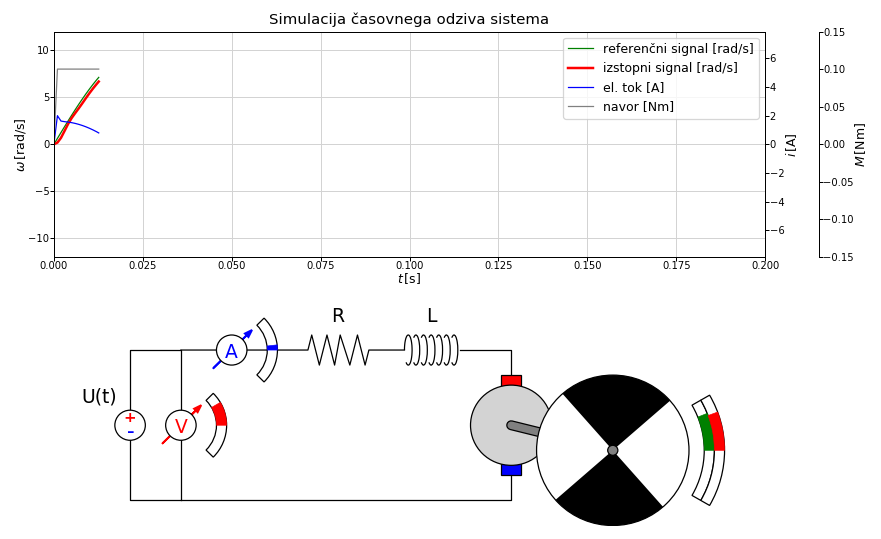

Output()

In [10]:
# Simulation data

anim_fig = plt.figure(num='Animacija 1')
anim_fig.set_size_inches((9.8, 6))
anim_fig.set_tight_layout(True)

anim_ax1 = anim_fig.add_subplot(211)
anim_ax2 = anim_ax1.twinx()
anim_ax3 = anim_ax1.twinx()

frame_count=1000

l1 = anim_ax1.plot([], [], lw=1, color='green')
l2 = anim_ax1.plot([], [], lw=2, color='red')
l3 = anim_ax2.plot([], [], lw=1, color='blue')
l4 = anim_ax3.plot([], [], lw=1, color='grey')

line1 = l1[0]
line2 = l2[0]
line3 = l3[0]
line4 = l4[0]

anim_ax1.legend(l1+l2+l3+l4, ['referenčni signal [rad/s]', 'izstopni signal [rad/s]', 'el. tok [A]', 'navor [Nm]'], loc=1)

anim_ax1.set_title('Simulacija časovnega odziva sistema', fontsize=12)
anim_ax1.set_xlabel(r'$t\/$[s]', labelpad=0, fontsize=10)
anim_ax1.set_ylabel(r'$\omega\/$[rad/s]', labelpad=0, fontsize=10)
anim_ax1.tick_params(axis='both', which='both', pad=0, labelsize=8)
anim_ax2.set_ylabel(r'$i\/$[A]', labelpad=0, fontsize=10)
anim_ax2.tick_params(axis='both', which='both', pad=0, labelsize=8)
anim_ax3.set_ylabel(r'$M\/$[Nm]', labelpad=0, fontsize=10)
anim_ax3.tick_params(axis='both', which='both', pad=0, labelsize=8)

anim_ax1.grid(which='both', axis='both', color='lightgray')

anim_ax3.spines["right"].set_position(("axes", 1.075))

T_plot = []
U_plot = []
M_plot = []
R_plot = []
I_plot = []

# Scene data

scene_ax = anim_fig.add_subplot(212)
scene_ax.set_xlim((-3, 4))
scene_ax.set_ylim((-1, 1.25))
scene_ax.axis('off')

scene_ax.add_patch(patches.Circle((-2.25, 0), fill=True, radius=0.15, ec='black', fc='white', lw=1, zorder=5))
scene_ax.add_patch(patches.Circle((-1.75, 0), fill=True, radius=0.15, ec='black', fc='white', lw=1, zorder=5))
scene_ax.add_patch(patches.Circle((-1.25, 0.75), fill=True, radius=0.15, ec='black', fc='white', lw=1, zorder=5))
scene_ax.add_patch(patches.FancyArrow(-1.93, -0.18, 0.38, 0.38,length_includes_head=True,
                                      head_width=0.05, head_length=0.075, fill=True, color='red', lw=1.5, zorder=0))
scene_ax.add_patch(patches.FancyArrow(-1.43, 0.57, 0.38, 0.38,length_includes_head=True,
                                      head_width=0.05, head_length=0.075, fill=True, color='blue', lw=1.5, zorder=0))

scene_ax.text(-1.75, 0, 'V', fontsize=15, color='red', va='center_baseline', ha='center', zorder=10)
scene_ax.text(-1.25, 0.75, 'A', fontsize=15, color='blue', va='center_baseline', ha='center', zorder=10)
scene_ax.text(-2.25, 0, '+', fontsize=12, weight='bold', color='red', va='bottom', ha='center', zorder=10)
scene_ax.text(-2.25, 0, '–', fontsize=12, weight='bold', color='blue', va='top', ha='center', zorder=10)
scene_ax.text(-2.55, 0.3, 'U(t)', fontsize=15, color='black', va='center_baseline', ha='center', zorder=10)

scene_ax.plot([-1.75, -1.75, -2.25, -2.25, 1.5, 1.5], [-0.75, 0.75, 0.75, -0.75, -0.75, -0.5], color='black', lw=1, zorder=0)
scene_ax.plot([-1.75, -0.5, -0.4625, -0.3875, -0.3125, -0.2375, -0.1825, -0.0875, -0.0125, 0.0625, 0.1, 0.45],
              [0.75, 0.75, 0.9, 0.6, 0.9, 0.6, 0.9, 0.6, 0.9, 0.6, 0.75, 0.75], color='black', lw=1, zorder=0)

scene_ax.add_patch(patches.Arc((0.4875, 0.75), 0.075, 0.3, theta1=-100, theta2=180, color='black', lw=1, zorder=0))
scene_ax.add_patch(patches.Arc((0.5625, 0.75), 0.075, 0.3, theta1=-100, theta2=100, color='black', lw=1, zorder=0))
scene_ax.add_patch(patches.Arc((0.6375, 0.75), 0.075, 0.3, theta1=-100, theta2=100, color='black', lw=1, zorder=0))
scene_ax.add_patch(patches.Arc((0.7125, 0.75), 0.075, 0.3, theta1=-100, theta2=100, color='black', lw=1, zorder=0))
scene_ax.add_patch(patches.Arc((0.7875, 0.75), 0.075, 0.3, theta1=-100, theta2=100, color='black', lw=1, zorder=0))
scene_ax.add_patch(patches.Arc((0.8625, 0.75), 0.075, 0.3, theta1=-100, theta2=100, color='black', lw=1, zorder=0))
scene_ax.add_patch(patches.Arc((0.9375, 0.75), 0.075, 0.3, theta1=-100, theta2=100, color='black', lw=1, zorder=0))

scene_ax.text(-0.21, 1.1, 'R', fontsize=15, color='black', va='center_baseline', ha='center', zorder=10)
scene_ax.text(0.7125, 1.1, 'L', fontsize=15, color='black', va='center_baseline', ha='center', zorder=10)

scene_ax.plot([1, 1.5, 1.5], [0.75, 0.75, 0.5], color='black', lw=1, zorder=0)

scene_ax.add_patch(patches.Rectangle((1.4, 0.3), 0.2, 0.2, fill=True, ec='black', fc='red', lw=1, zorder=5))
scene_ax.add_patch(patches.Rectangle((1.4, -0.5), 0.2, 0.2, fill=True, ec='black', fc='blue', lw=1, zorder=5))
scene_ax.add_patch(patches.Circle((1.5, 0), fill=True, radius=0.4, ec='black', fc='lightgray', lw=1, zorder=10))

scene_ax.plot([1.5, 2.5], [0, -0.25], color='black', solid_capstyle='round', lw=8, zorder=15)
scene_ax.plot([1.5, 2.5], [0, -0.25], color='gray', solid_capstyle='round', lw=6, zorder=20)

scene_ax.add_patch(patches.Circle((2.5, -0.25), fill=True, radius=0.75, ec='black', fc='white', lw=1, zorder=25))
scene_ax.add_patch(patches.Circle((2.5, -0.25), fill=True, radius=0.05, ec='black', fc='gray', lw=1, zorder=35))

scene_ax.add_patch(patches.Wedge((-1.75, 0), 0.45, width=0.1, theta1=-45, theta2=45,
                                 fill=True, ec='black', fc='white', lw=1, zorder=10))
scene_ax.add_patch(patches.Wedge((-1.25, 0.75), 0.45, width=0.1, theta1=-45, theta2=45,
                                 fill=True, ec='black', fc='white', lw=1, zorder=10))
scene_ax.add_patch(patches.Wedge((2.5, -0.25), 1, width=0.1, theta1=-30, theta2=30,
                                 fill=True, ec='black', fc='white', lw=1, zorder=10))
scene_ax.add_patch(patches.Wedge((2.5, -0.25), 1.1, width=0.1, theta1=-30, theta2=30,
                                 fill=True, ec='black', fc='white', lw=1, zorder=10))

spinner_1 = patches.Wedge((2.5, -0.25), 0.75, theta1=0, theta2=90, fill=True, ec='black', fc='black', lw=0, zorder=30)
spinner_2 = patches.Wedge((2.5, -0.25), 0.75, theta1=180, theta2=270, fill=True, ec='black', fc='black', lw=0, zorder=30)
scene_ax.add_patch(spinner_1)
scene_ax.add_patch(spinner_2)

v_bar = patches.Wedge((-1.75, 0), 0.45, width=0.1, theta1=0, theta2=0, fill=True, ec='red', fc='red', lw=0.5, zorder=15)
a_bar = patches.Wedge((-1.25, 0.75), 0.45, width=0.1, theta1=0, theta2=0, fill=True, ec='blue', fc='blue', lw=0.5, zorder=15)
r_bar = patches.Wedge((2.5, -0.25), 1, width=0.1, theta1=0, theta2=0, fill=True, ec='green', fc='green', lw=0.5, zorder=15)
w_bar = patches.Wedge((2.5, -0.25), 1.1, width=0.1, theta1=0, theta2=0, fill=True, ec='red', fc='red', lw=0.5, zorder=20)
scene_ax.add_patch(v_bar)
scene_ax.add_patch(a_bar)
scene_ax.add_patch(r_bar)
scene_ax.add_patch(w_bar)

v_var = []
a_var = []
r_var = []
w_var = []
rot_var = []

#Simulation function

def simulation(iKp, iTi, iTd, iFd, iTi0, iTd0, iFd0, wKp, wTi, wTd, wFd, wTi0, wTd0, wFd0,
               sel, T, dt, U, Uf, Ua, Uo, M, Mf, Ma, Mo):
    
    W_e = c.tf([1], [L[sel], R[sel]])   # Electrical part
    W_m = c.tf([1], [J[sel], B[sel]])   # Mechanical part
    W_t = c.tf([kPhi], [1])   # EMF / torque constant
    W_current = c.feedback(W_e, c.series(W_t, W_m, W_t))   # System model for current output
    W_motor = c.feedback(c.series(W_e, W_t, W_m), W_t, -1)   # DC motor transfer function
    
    # Current controller
    iP = iKp             # Proportional term
    iI = iKp / iTi       # Integral term
    iD = iKp * iTd       # Derivative term
    iTd_f = iTd / iFd    # Derivative term filter
    
    W_iPID = c.parallel(c.tf([iP], [1]),
                        c.tf([iI * iTi0], [1 * iTi0, 1 * (not iTi0)]),
                        c.tf([iD * iTd0, 0], [iTd_f * iTd0 * iFd0, 1]))  # PID szabályozó
    
    # Speed controller  
    wP = wKp             # Proportional term
    wI = wKp / wTi       # Integral term
    wD = wKp * wTd       # Derivative term
    wTd_f = wTd / wFd    # Derivative term filter
    
    W_wPID = c.parallel(c.tf([wP], [1]),
                        c.tf([wI * wTi0], [1 * wTi0, 1 * (not wTi0)]),
                        c.tf([wD * wTd0, 0], [wTd_f * wTd0 * wFd0, 1]))  # PID szabályozó
    
    # Speed controlled system
    W_wsys = c.feedback(c.series(W_wPID, c.feedback(c.series(W_iPID, W_current), 1, -1), W_motor), 1, -1)  # Closed loop
    W_wload = c.feedback(W_m, c.series(c.parallel(W_t, c.series(W_iPID, W_wPID)),
                                       c.feedback(W_e, W_iPID, -1), W_t), -1)       # Load transfer function
    
    # Current transfer based on the reference and load
    W_isys = c.feedback(c.series(W_wPID, c.feedback(c.series(W_iPID, c.feedback(W_e, c.series(W_t, W_m, W_t), -1)), 1, -1)),
                        c.series(W_t, W_m), -1)
    W_iload = c.feedback(c.series(W_m, c.parallel(c.negate(W_t), c.negate(c.series(W_wPID, W_iPID))),
                                  c.feedback(W_e, W_iPID, -1)), W_t, 1)
    
    # Signals

    T_sim = np.arange(0, T, dt, dtype=np.float64)
    
    if U == 0:     # Constant reference
        U_sim = np.full_like(T_sim, Ua * Uo)
    elif U == 1:   # Sine wave reference
        U_sim = (np.sin(2 * np.pi * Uf * T_sim) + Uo) * Ua
    elif U == 2:   # Square wave reference
        U_sim = (np.sign(np.sin(2 * np.pi * Uf * T_sim)) + Uo) * Ua
        
    if M == 0:     # Constant load
        M_sim = np.full_like(T_sim, Ma * Mo)
    elif M == 1:   # Sine wave load
        M_sim = (np.sin(2 * np.pi * Mf * T_sim) + Mo) * Ma
    elif M == 2:   # Square wave load
        M_sim = (np.sign(np.sin(2 * np.pi * Mf * T_sim)) + Mo) * Ma
    elif M == 3:   # Noise form load
        M_sim = np.interp(T_sim,
                           np.linspace(0, T, int(T * Mf) + 2),
                           np.random.normal(loc=(Mo * Ma), scale=Ma,
                                            size=int(T * Mf) + 2)
                          )
    
    # System response
        
    Tu, youtu, xoutu = c.forced_response(W_wsys, T_sim, U_sim)
    Tm, youtm, xoutm = c.forced_response(W_wload, T_sim, M_sim)
    R_sim = np.nan_to_num(youtu + youtm)
    
    Tu2, youtu2, xoutu2 = c.forced_response(W_isys, T_sim, U_sim)
    Tm2, youtm2, xoutm2 = c.forced_response(W_iload, T_sim, M_sim)
    I_sim = np.nan_to_num(youtu2 + youtm2)
    
    # Display
            
    UR_max = max(np.amax(np.absolute(np.concatenate((U_sim, R_sim)))), Ua)
    M_max = max(np.amax(np.absolute(M_sim)), Ma)
    I_max = max(np.amax(np.absolute(I_sim)), 1e-8)
    
    anim_ax1.set_xlim((0, T))
    anim_ax1.set_ylim((-1.2 * UR_max, 1.2 * UR_max))
    anim_ax2.set_ylim((-1.5 * I_max, 1.5 * I_max))
    anim_ax3.set_ylim((-1.5 * M_max, 1.5 * M_max))
    
    global T_plot, U_plot, M_plot, R_plot, I_plot, v_var, a_var, r_var, w_var, rot_var
    
    T_plot = np.linspace(0, T, frame_count, dtype=np.float32)
    U_plot = np.interp(T_plot, T_sim, U_sim)
    M_plot = np.interp(T_plot, T_sim, M_sim)
    R_plot = np.interp(T_plot, T_sim, R_sim)
    I_plot = np.interp(T_plot, T_sim, I_sim)
    
    v_var = R_plot / UR_max * 45
    a_var = I_plot / I_max * 45
    r_var = U_plot / UR_max * 30
    w_var = R_plot / UR_max * 30
    
    rot_var = np.cumsum(R_plot) / UR_max * 10   # The constant sets the apparent speed of the animation
        
def anim_init():
    line1.set_data([], [])
    line2.set_data([], [])
    line3.set_data([], [])
    line4.set_data([], [])
    
    v_bar.set_theta1(0)
    v_bar.set_theta2(0)
    a_bar.set_theta1(0)
    a_bar.set_theta2(0)
    r_bar.set_theta1(0)
    r_bar.set_theta2(0)
    w_bar.set_theta1(0)
    w_bar.set_theta2(0)
    
    spinner_1.set_theta1(0)
    spinner_1.set_theta2(90)
    spinner_2.set_theta1(180)
    spinner_2.set_theta2(270)
    
    return (line1, line2, line3, line4, v_bar, a_bar, r_bar, w_bar, spinner_1, spinner_2,)

def animate(i):
    line1.set_data(T_plot[0:i], U_plot[0:i])
    line2.set_data(T_plot[0:i], R_plot[0:i])
    line3.set_data(T_plot[0:i], I_plot[0:i])
    line4.set_data(T_plot[0:i], M_plot[0:i])
    
    if v_var[i] < 0:
        v_bar.set_theta1(v_var[i])
        v_bar.set_theta2(0)
    else:
        v_bar.set_theta1(0)
        v_bar.set_theta2(v_var[i])
        
    if a_var[i] < 0:
        a_bar.set_theta1(a_var[i])
        a_bar.set_theta2(0)
    else:
        a_bar.set_theta1(0)
        a_bar.set_theta2(a_var[i])
        
    if r_var[i] < 0:
        r_bar.set_theta1(r_var[i])
        r_bar.set_theta2(0)
    else:
        r_bar.set_theta1(0)
        r_bar.set_theta2(r_var[i])
        
    if w_var[i] < 0:
        w_bar.set_theta1(w_var[i])
        w_bar.set_theta2(0)
    else:
        w_bar.set_theta1(0)
        w_bar.set_theta2(w_var[i])
        
    spinner_1.set_theta1(rot_var[i])
    spinner_1.set_theta2(rot_var[i] + 90)
    spinner_2.set_theta1(rot_var[i] + 180)
    spinner_2.set_theta2(rot_var[i] + 270)

    return (line1, line2, line3, line4, a_bar, r_bar, w_bar, spinner_1, spinner_2,)

anim = animation.FuncAnimation(anim_fig, animate, init_func=anim_init,
                               frames=frame_count, interval=10, blit=True,
                               repeat=True)
    
# Controllers

T_slider = w.FloatLogSlider(value=0.2, base=10, min=-0.7, max=1, step=0.01,
                            description='trajanje [s]:', continuous_update=False,
                            orientation='vertical', layout=w.Layout(width='auto', height='auto', flex='1 1 auto'))

dt_slider = w.FloatLogSlider(value=0.001, base=10, min=-3, max=-1, step=0.01,
                             description='časovni korak [s]:', continuous_update=False,
                             orientation='vertical', layout=w.Layout(width='auto', height='auto', flex='1 1 auto'))

U_type = w.Dropdown(options=[('konstantna funkcija', 0), ('sinusni val', 1), ('kvadratni val', 2)], value=1,
                     description='Referenčni signal: ', continuous_update=False, layout=w.Layout(width='auto', flex='3 3 auto'))    
Uf_slider = w.FloatLogSlider(value=10, base=10, min=-2, max=2, step=0.01,
                             description='frekvenca [Hz]:', continuous_update=False,
                             orientation='vertical', layout=w.Layout(width='auto', height='auto', flex='1 1 auto'))
Ua_slider = w.FloatLogSlider(value=10, base=10, min=-2, max=2, step=0.01,
                             description='amplituda [rad/s]:', continuous_update=False,
                             orientation='vertical', layout=w.Layout(width='auto', height='auto', flex='1 1 auto'))
Uo_slider = w.FloatSlider(value=0, min=-10, max=10, description='U0:', continuous_update=False,
                              orientation='vertical', layout=w.Layout(width='auto', height='auto', flex='1 1 auto'))    
    
M_type = w.Dropdown(options=[('konstantna funkcija', 0), ('sinusni val', 1), ('kvadratni val', 2), ('šum', 3)], value=2,
                     description='Obremenitev: ', continuous_update=False, layout=w.Layout(width='auto', flex='3 3 auto'))    
Mf_slider = w.FloatLogSlider(value=25, base=10, min=-2, max=2, step=0.01,
                             description='frekvenca [Hz]:', continuous_update=False,
                             orientation='vertical', layout=w.Layout(width='auto', height='auto', flex='1 1 auto'))
Ma_slider = w.FloatLogSlider(value=0.1, base=10, min=-2, max=2, step=0.01,
                             description='amplituda [Nm]:', continuous_update=False,
                             orientation='vertical', layout=w.Layout(width='auto', height='auto', flex='1 1 auto'))
Mo_slider = w.FloatSlider(value=0, min=-10, max=10, description='M0:', continuous_update=False,
                              orientation='vertical', layout=w.Layout(width='auto', height='auto', flex='1 1 auto'))

input_data = w.interactive_output(simulation, {'iKp': iKp_slider, 'iTi': iTi_slider, 'iTd': iTd_slider,
                                               'iFd': iFd_slider, 'iTi0' : iTi_button, 'iTd0': iTd_button,
                                               'iFd0': iFd_button,
                                               'wKp': wKp_slider, 'wTi': wTi_slider, 'wTd': wTd_slider,
                                               'wFd': wFd_slider, 'wTi0' : wTi_button, 'wTd0': wTd_button,
                                               'wFd0': wFd_button,
                                               'sel':typeSelect,
                                               'T': T_slider, 'dt': dt_slider,
                                               'U': U_type, 'Uf': Uf_slider, 'Ua': Ua_slider, 'Uo': Uo_slider,
                                               'M': M_type, 'Mf': Mf_slider, 'Ma': Ma_slider, 'Mo': Mo_slider})

display(w.HBox([w.HBox([T_slider, dt_slider], layout=w.Layout(width='25%')),
                w.Box([], layout=w.Layout(width='5%')),
                w.VBox([U_type, w.HBox([Uf_slider, Ua_slider, Uo_slider])], layout=w.Layout(width='30%')),
                w.Box([], layout=w.Layout(width='5%')),
                w.VBox([M_type, w.HBox([Mf_slider, Ma_slider, Mo_slider])], layout=w.Layout(width='30%'))],
                layout=w.Layout(width='100%', justify_content='center')), input_data)

Parameter *trajanje* vpliva na prikaz simulacije, parameter *časovni korak* pa vpliva na frekvenco vzročenja in s tem izboljša rezultat, a na račun povečane računske moči.

<!-- The duration parameter controls the simulated timeframe and does not affect the runtime of the animation. In contrast, the timestep controls the model sampling and can refine the results in exchange for higher computational resources. -->